Análise da dimensão do vocabulário

In [58]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'plotMatriz.py'; 'plotMatriz' is not a package

In [64]:

import numpy as np
import itertools
import matplotlib.pyplot as plt
def plotMatriz(cm, classes=[],
                          normalize=False,
                          title='Matriz de Confusão',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusão normalizada")

    if len(classes)==0:
        classes=range(cm.shape[0])

    plt.imshow(cm, interpolation='none', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe verdadeira')
    plt.xlabel('Classe estimada')


def avaliacaoBinaria(y, ye, verbose=False, matriz=False): 
    CM = confusion_matrix(y, ye)
    
    if matriz: 
        plt.figure()
        plotMatriz(CM)
    
    TP = CM[1][1]
    TN = CM[0][0]
    FN = CM[0][1]
    FP = CM[1][0]

    recall = round(TP /(TP + FN), 3)
    false_alarm = round(FP / (FP + TN), 3)
    precision = round(TP / (TP + FP), 3)

    f_score = round(2* ((precision * recall)/(precision + recall)), 3)

    if verbose: 
        print("TP", TP)
        print("TN", TN)
        print("FP", FP)
        print("FN", FN)

        print("Recall: ", recall)
        print("False Alarm Rate: ", false_alarm)
        print("Precision: ", precision)
        print("F-Score: ", f_score)

    return recall, false_alarm, precision, f_score


def avaliacaoMulticlasse(y, ye, verbose=False): 

    CM = confusion_matrix(y, ye)

    plotMatriz(CM)



In [42]:
fN = "imdbFull.p"

D = pickle.load(open(fN, 'rb'))

print(D.keys())

corpus = D.data
y = D.target

# print("Shape Corpus: ", len(corpus))
# print("Shape Avaliações: ", y.shape)

# print(D.DESCR)

# corpus = corpus[:10]
# y = y[:10]
y = np.array(list(map(lambda i: 0 if i < 5 else 1, y)))

print("Shape Corpus: ", len(corpus))
print("Shape Avaliações: ", y.shape)


dict_keys(['data', 'target', 'DESCR'])
Shape Corpus:  50000
Shape Avaliações:  (50000,)


Sem limpeza

Tamanho do dicionário:  101895
Treino: 
- Recall:  0.926
- False Alarm:  0.063
- Precision:  0.938
- F-Score:  0.932

Teste: 
- Recall:  0.879
- False Alarm:  0.097
- Precision:  0.906
- F-Score:  0.892


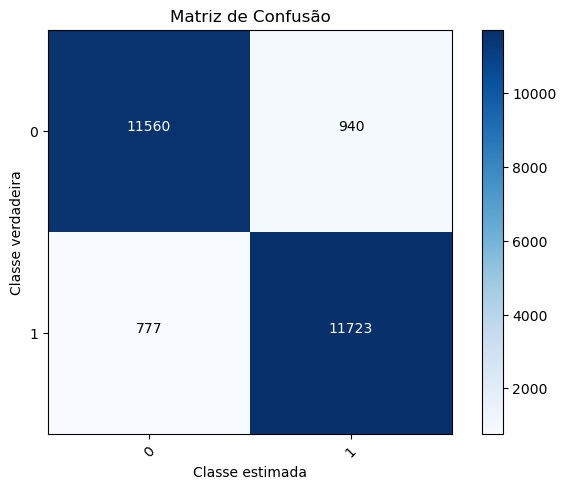

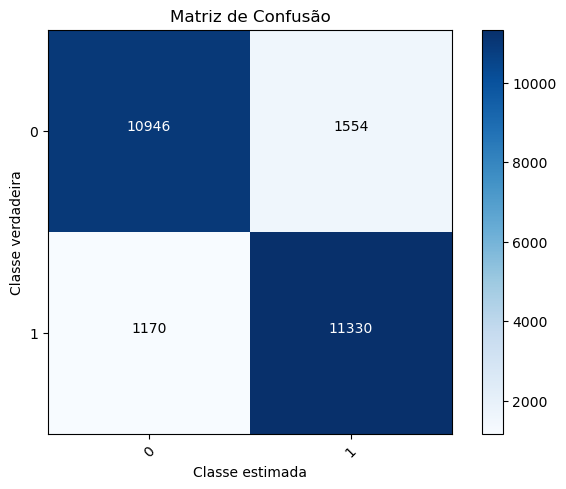

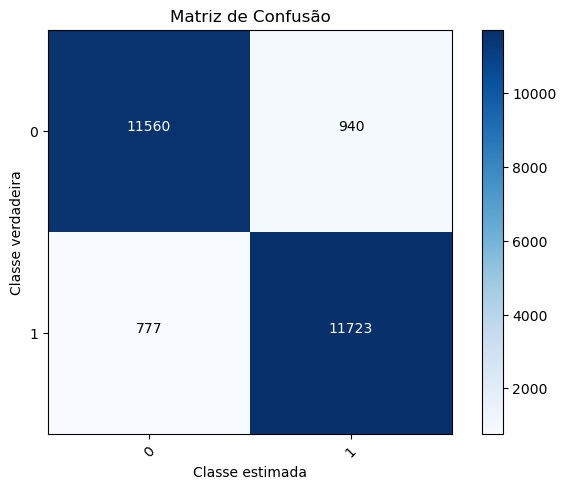

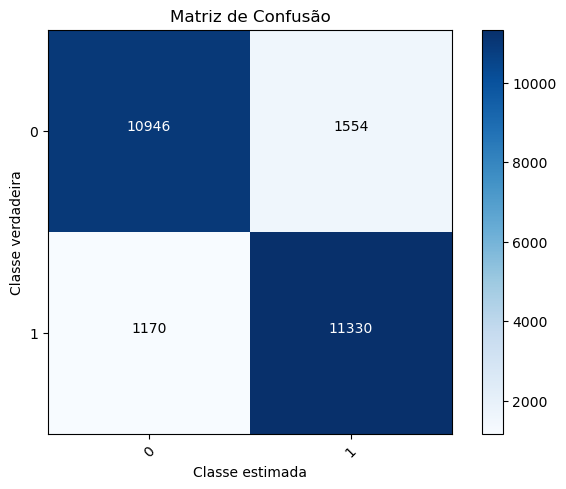

In [65]:
tf = TfidfVectorizer().fit(corpus)
vocabulary = tf.get_feature_names_out()
print("Tamanho do dicionário: ", len(vocabulary))
corpusVect = tf.transform(corpus)

X1, X2, y1, y2 = train_test_split(corpusVect, y, test_size=0.5, shuffle=True, stratify=y)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X1, y1)
y1e = lr.predict(X1)
y2e = lr.predict(X2)

print("Treino: ")
sl_recall_treino, sl_false_alarm_treino, sl_precision_treino, sl_f_score_treino = avaliacaoBinaria(y1, y1e, matriz=True)
print("- Recall: ", sl_recall_treino)
print("- False Alarm: ", sl_false_alarm_treino)
print("- Precision: ", sl_precision_treino)
print("- F-Score: ", sl_f_score_treino)

print("\nTeste: ")
sl_recall_teste, sl_false_alarm_teste, sl_precision_teste, sl_f_score_teste = avaliacaoBinaria(y2, y2e, matriz=True)
print("- Recall: ", sl_recall_teste)
print("- False Alarm: ", sl_false_alarm_teste)
print("- Precision: ", sl_precision_teste)
print("- F-Score: ", sl_f_score_teste)

plt.figure()
avaliacaoMulticlasse(y1, y1e)
plt.figure()
avaliacaoMulticlasse(y2, y2e)

# plt.figure(figsize=(10, 5))
# plt.subplot(121)
# plt.title("Falsos Alarmes Vs Recall")
# plt.xlabel("Falsos Alarmes")
# plt.ylabel("Recall")
# plt.plot(false_alarm_treino, recall_treino, '.')
# plt.plot(false_alarm_teste, recall_teste, '.')
# plt.annotate("sem limpeza", (false_alarm_treino, recall_treino))
# plt.annotate("sem limpeza", (false_alarm_teste, recall_teste))
# plt.axis([0, 1, 0, 1])
# plt.grid(True)

# plt.subplot(122)
# plt.title("Recall Vs Precision")
# plt.xlabel("Recall")
# plt.ylabel("Precision")
# plt.plot(recall_treino, precision_treino, '.')
# plt.plot(recall_teste, precision_teste, '.')
# plt.legend(["Treino", "Teste"])
# plt.axis([0, 1, 0, 1])
# plt.grid(True)


# print("Treino: ")
# print("Número de erros: ", np.sum(y1 != y1e))
# print("Probabilidade de Erro: ", np.sum(y1 != y1e)/len(y1), "%")
# print("Matriz de Confusão: \n", confusion_matrix(y1, y1e))

# print("Teste: ")
# print("Número de erros: ", np.sum(y2 != y2e))
# print("Probabilidade de Erro: ", np.sum(y2 != y2e)/len(y2), "%")
# print("Matriz de Confusão: \n", confusion_matrix(y2, y2e))


Com Limpeza - Alfabética

In [44]:
# Limpeza Alfabética
import re 
corpus_alpha = [re.sub(r'[^a-zA-Z]+', ' ', critica) for critica in corpus]

corpus_alpha = [critica.replace('<br/>', ' ') for critica in corpus_alpha]
corpus_alpha = [critica.replace('<br>', ' ') for critica in corpus_alpha]



tf = TfidfVectorizer().fit(corpus_alpha)
vocabulary = tf.get_feature_names_out()
print("Tamanho do dicionário: ", len(vocabulary))
corpusVect = tf.transform(corpus_alpha)

X1, X2, y1, y2 = train_test_split(corpusVect, y, test_size=0.5, shuffle=True, stratify=y)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X1, y1)
y1e = lr.predict(X1)
y2e = lr.predict(X2)

print("Treino: ")
la_recall_treino, la_false_alarm_treino, la_precision_treino, la_f_score_treino = avaliacaoBinaria(y1, y1e)
print("- Recall: ", la_recall_treino)
print("- False Alarm: ", la_false_alarm_treino)
print("- Precision: ", la_precision_treino)
print("- F-Score: ", la_f_score_treino)

print("\nTeste: ")
la_recall_teste, la_false_alarm_teste, la_precision_teste, la_f_score_teste = avaliacaoBinaria(y2, y2e)
print("- Recall: ", la_recall_teste)
print("- False Alarm: ", la_false_alarm_teste)
print("- Precision: ", la_precision_teste)
print("- F-Score: ", la_f_score_teste)

# print("Treino: ")
# print("Número de erros: ", np.sum(y1 != y1e))
# print("Probabilidade de Erro: ", np.sum(y1 != y1e)/len(y1), "%")
# print("Matriz de Confusão: \n", confusion_matrix(y1, y1e))

# print("Teste: ")
# print("Número de erros: ", np.sum(y2 != y2e))
# print("Probabilidade de Erro: ", np.sum(y2 != y2e)/len(y2), "%")
# print("Matriz de Confusão: \n", confusion_matrix(y2, y2e))


Tamanho do dicionário:  99400
Treino: 
[[11596   904]
 [  755 11745]]
Recall:  0.929
False Alarm Rate:  0.061
Precision:  0.94
F-Score:  0.934
- Recall:  0.929
- False Alarm:  0.061
- Precision:  0.94
- F-Score:  0.934

Teste: 
[[10979  1521]
 [ 1279 11221]]
Recall:  0.881
False Alarm Rate:  0.104
Precision:  0.898
F-Score:  0.889
- Recall:  0.881
- False Alarm:  0.104
- Precision:  0.898
- F-Score:  0.889


c:\Users\anaso\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Com Limpeza - Alfanumérica

In [45]:
# Limpeza Alfanumérica
import re 
corpus_alpha_num = [re.sub(r'[^a-zA-Z0-9]+', ' ', critica) for critica in corpus]
corpus_alpha_num = [critica.replace('<br/>', ' ') for critica in corpus_alpha_num]
corpus_alpha_num = [critica.replace('<br>', ' ') for critica in corpus_alpha_num]



tf = TfidfVectorizer().fit(corpus_alpha_num)
vocabulary = tf.get_feature_names_out()
print("Tamanho do dicionário: ", len(vocabulary))
corpusVect = tf.transform(corpus_alpha_num)

X1, X2, y1, y2 = train_test_split(corpusVect, y, test_size=0.5, shuffle=True, stratify=y)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X1, y1)
y1e = lr.predict(X1)
y2e = lr.predict(X2)


print("Treino: ")
lan_recall_treino, lan_false_alarm_treino, lan_precision_treino, lan_f_score_treino = avaliacaoBinaria(y1, y1e)
print("- Recall: ", lan_recall_treino)
print("- False Alarm: ", lan_false_alarm_treino)
print("- Precision: ", lan_precision_treino)
print("- F-Score: ", lan_f_score_treino)

print("\nTeste: ")
lan_recall_teste, lan_false_alarm_teste, lan_precision_teste, lan_f_score_teste = avaliacaoBinaria(y2, y2e)
print("- Recall: ", lan_recall_teste)
print("- False Alarm: ", lan_false_alarm_teste)
print("- Precision: ", lan_precision_teste)
print("- F-Score: ", lan_f_score_teste)

# print("Treino: ")
# print("Número de erros: ", np.sum(y1 != y1e))
# print("Probabilidade de Erro: ", np.sum(y1 != y1e)/len(y1), "%")
# print("Matriz de Confusão: \n", confusion_matrix(y1, y1e))

# print("Teste: ")
# print("Número de erros: ", np.sum(y2 != y2e))
# print("Probabilidade de Erro: ", np.sum(y2 != y2e)/len(y2), "%")
# print("Matriz de Confusão: \n", confusion_matrix(y2, y2e))


Tamanho do dicionário:  101213
Treino: 
[[11580   920]
 [  727 11773]]
Recall:  0.928
False Alarm Rate:  0.059
Precision:  0.942
F-Score:  0.935
- Recall:  0.928
- False Alarm:  0.059
- Precision:  0.942
- F-Score:  0.935

Teste: 
[[10981  1519]
 [ 1198 11302]]
Recall:  0.882
False Alarm Rate:  0.098
Precision:  0.904
F-Score:  0.893
- Recall:  0.882
- False Alarm:  0.098
- Precision:  0.904
- F-Score:  0.893


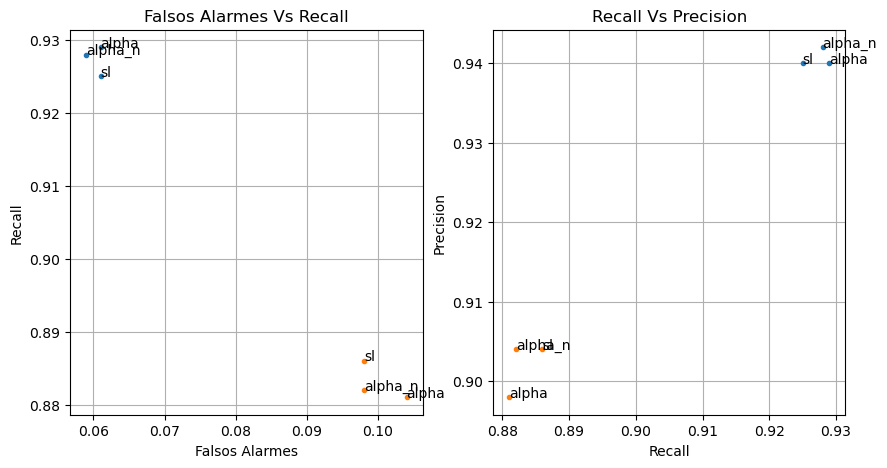

In [49]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title("Falsos Alarmes Vs Recall")
plt.xlabel("Falsos Alarmes")
plt.ylabel("Recall")
plt.plot([sl_false_alarm_treino, la_false_alarm_treino, lan_false_alarm_treino], [sl_recall_treino, la_recall_treino, lan_recall_treino], '.')
plt.plot([sl_false_alarm_teste, la_false_alarm_teste, lan_false_alarm_teste], [sl_recall_teste, la_recall_teste, lan_recall_teste], '.')
plt.annotate("sl", (sl_false_alarm_treino, sl_recall_treino))
plt.annotate("alpha", (la_false_alarm_treino, la_recall_treino))
plt.annotate("alpha_n", (lan_false_alarm_treino, lan_recall_treino))
plt.annotate("sl", (sl_false_alarm_teste, sl_recall_teste))
plt.annotate("alpha", (la_false_alarm_teste, la_recall_teste))
plt.annotate("alpha_n", (lan_false_alarm_teste, lan_recall_teste))

# plt.axis([0, 1, 0, 1])
plt.grid(True)

plt.subplot(122)
plt.title("Recall Vs Precision")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot( [sl_recall_treino, la_recall_treino, lan_recall_treino],  [sl_precision_treino, la_precision_treino, lan_precision_treino], '.')
plt.plot([sl_recall_teste, la_recall_teste, lan_recall_teste], [sl_precision_teste, la_precision_teste, lan_precision_teste], '.')
plt.annotate("sl", (sl_recall_treino, sl_precision_treino))
plt.annotate("alpha", (la_recall_treino, la_precision_treino))
plt.annotate("alpha_n", (lan_recall_treino, lan_precision_treino))

plt.annotate("sl", (sl_recall_teste, sl_precision_teste))
plt.annotate("alpha", (la_recall_teste, la_precision_teste))
plt.annotate("alpha_n", (lan_recall_teste, lan_precision_teste))

# plt.axis([0, 1, 0, 1])
plt.grid(True)